In [285]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 数据合并

In [286]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

full = pd.concat([df_train, df_test], axis = 0)
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [287]:
full.set_index('PassengerId', drop=False, inplace=True)
train = full[:891]
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## 数据查看
* 缺失值查看

In [288]:
display(full.isnull().sum())

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

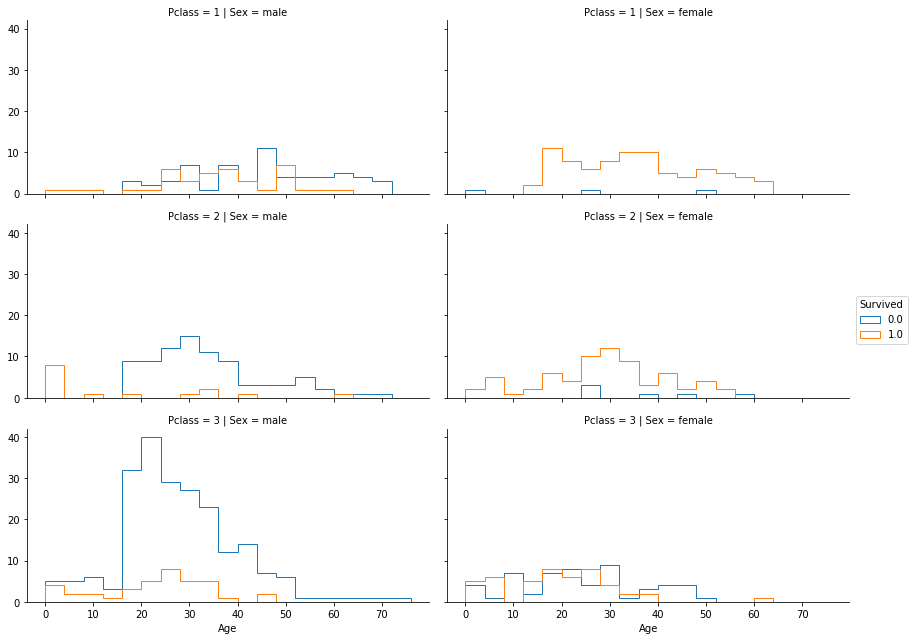

In [289]:
facet = sns.FacetGrid(full, row='Pclass', col='Sex', hue='Survived', aspect=2)
facet.map(plt.hist, 'Age', histtype='step', bins = np.arange(0, 80, 4))
facet.add_legend()

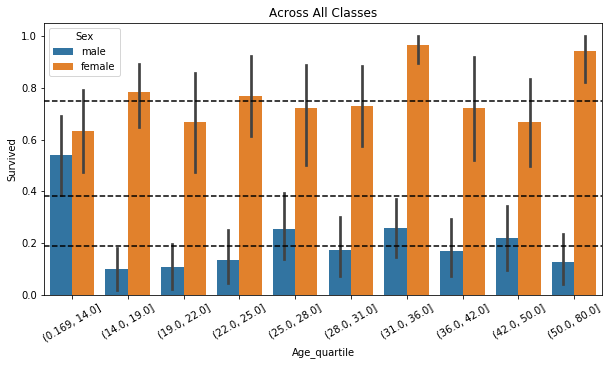

In [290]:
full['Age_quartile'] = pd.qcut(full.Age, 10)

# Plot age quartiles by sex with survival rate
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'Age_quartile', y='Survived', hue = 'Sex');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.axhline(y=0.75, color='k', linestyle='--')
plt.axhline(y=0.19, color='k', linestyle='--')
plt.xticks(rotation = 30);
plt.title('Across All Classes');

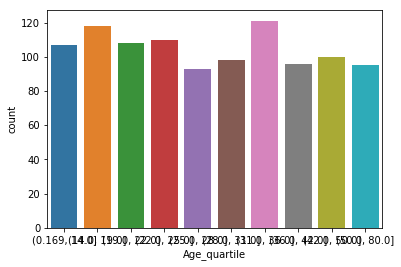

In [291]:
sns.countplot(full["Age_quartile"])

In [292]:
# # 添加boy特征
# full['Boy'] = (full['Age'] <= 14) * (full['Sex'] == 'male').astype(int)
# full['MidLady'] = ((full['Age'] <= 36) & (full['Age'] > 31)) * (full['Sex'] == 'female').astype(int)
# full['OldLady'] = ((full['Age'] <= 80) & (full['Age'] > 50)) * (full['Sex'] == 'female').astype(int)
                   

In [293]:
full.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age_quartile
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(19.0, 22.0]"
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,"(36.0, 42.0]"
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,"(25.0, 28.0]"
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,"(31.0, 36.0]"
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,"(31.0, 36.0]"
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,NaN
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,"(50.0, 80.0]"
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,"(0.169, 14.0]"
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,"(25.0, 28.0]"


In [294]:
import re
def parse_ticket(str1):
    m = re.search(r'(.*)(\s\d|\s\d{4,7}$)',str1)
    s = re.search(r'[A-Z]+',str1)
    if m:
        str2 = m.group(1)
        n =re.search(r'([A-Z]+)[^A-Z0-9]*([A-Z]+)*[^A-Z0-9]*([A-Z0-9]*)[^A-Z]*([A-Z]*)*',str2)
        new_str = ''
        if n:    
            if n.group(1):
                new_str+=n.group(1)
                if n.group(2) or n.group(3):
                    if n.group(2):
                        new_str+=n.group(2)
                    if n.group(3):
                        new_str+=n.group(3)
                        if n.group(4):
                            new_str+=n.group(4)
                            if n.group(5):
                                new_str+=m.group(5)
    elif s:
        new_str = s.group(0)
    else:
        new_str = 'XXX'
    return new_str

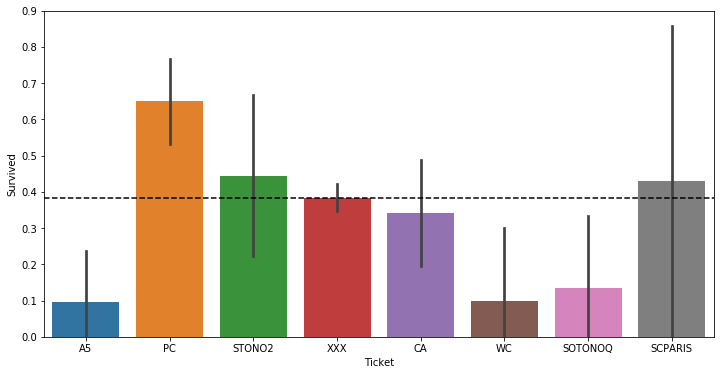

In [295]:
ticket = pd.DataFrame(full.Survived)
# 票与survival的相关性
ticket['Ticket'] = full.Ticket.map(parse_ticket)
d = dict(zip(ticket.Ticket.value_counts().index, ticket.Ticket.value_counts()))
ticket['Ticket_count'] = ticket['Ticket'].map(d)
plt.figure(figsize = (12,6))
sns.barplot(data = ticket[ticket['Ticket_count'] > 10], x = 'Ticket', y = 'Survived')
plt.axhline(y=0.3838, color='k', linestyle='--')

In [296]:
full['TicketHead'] = full.Ticket.map(parse_ticket)
full['Ticket_A5'] = (full['TicketHead'] == 'A5').astype(int)
full['Ticket_PC'] = (full['TicketHead'] == 'PC').astype(int)
full['Ticket_WC'] = (full['TicketHead'] == 'WC').astype(int)
full['Ticket_SOTONOQ'] = (full['TicketHead'] == 'SOTONOQ').astype(int)
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age_quartile,TicketHead,Ticket_A5,Ticket_PC,Ticket_WC,Ticket_SOTONOQ
PassengerId,,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(19.0, 22.0]",A5,1,0,0,0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,"(36.0, 42.0]",PC,0,1,0,0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,"(25.0, 28.0]",STONO2,0,0,0,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,"(31.0, 36.0]",XXX,0,0,0,0
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,"(31.0, 36.0]",XXX,0,0,0,0


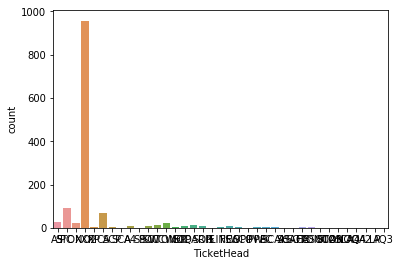

In [297]:
sns.countplot(full["TicketHead"])

我们发现了一些和survived相关性较强的票面特征，如A5,PC等

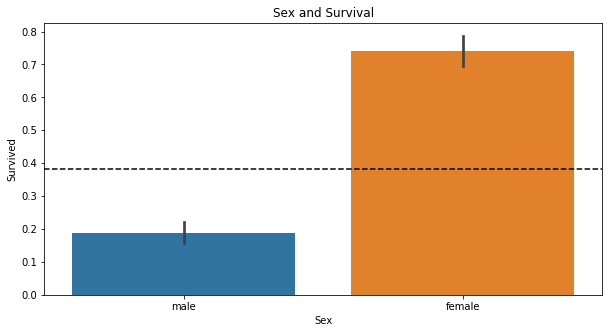

In [298]:
# 性别与survival的相关性
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'Sex', y='Survived');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.title('Sex and Survival');

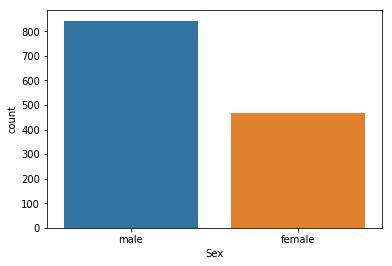

In [299]:
sns.countplot(full['Sex'])

In [300]:
full['isMale'] = (full['Sex'] == 'male').astype(int)

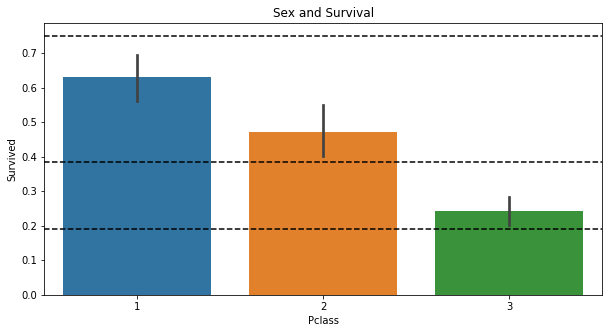

In [301]:
# class与survival的相关性
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'Pclass', y='Survived');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.axhline(y=0.75, color='k', linestyle='--')
plt.axhline(y=0.19, color='k', linestyle='--')
plt.title('Sex and Survival');

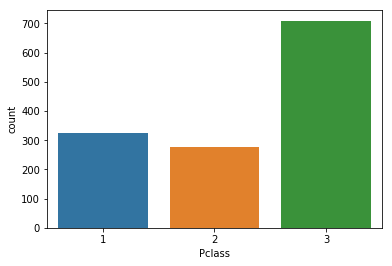

In [302]:
sns.countplot(full['Pclass'])

## 感觉特征交叉不明显

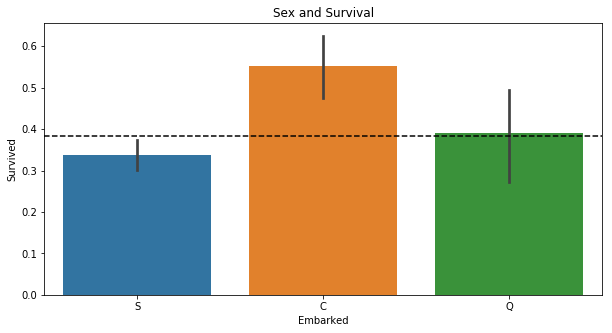

In [303]:
# embarked与survival的相关性
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'Embarked', y='Survived');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.title('Sex and Survival');

In [304]:
# 提取特征C 
full['Embarked_C'] = (full['Embarked'] == 'C').astype(int)

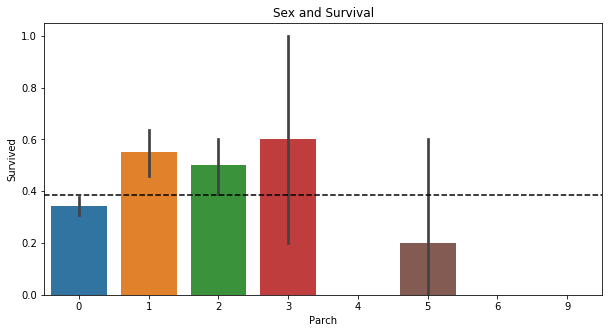

In [305]:
# parch与survival的相关性
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'Parch', y='Survived');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.title('Sex and Survival');

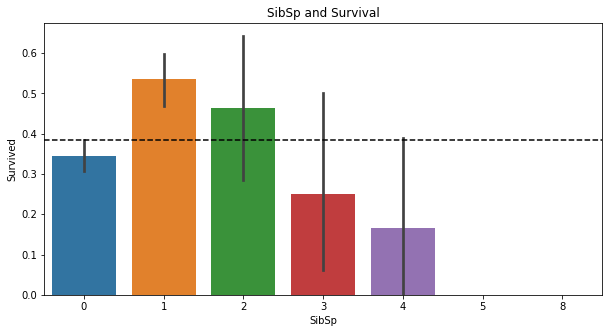

In [306]:
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'SibSp', y='Survived');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.title('SibSp and Survival');

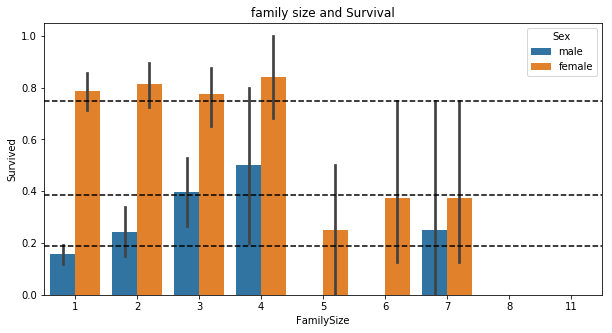

In [307]:
full['FamilySize'] = full['Parch'] + full['SibSp'] + 1
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'FamilySize', y='Survived', hue = 'Sex');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.axhline(y=0.75, color='k', linestyle='--')
plt.axhline(y=0.19, color='k', linestyle='--')
plt.title('family size and Survival');

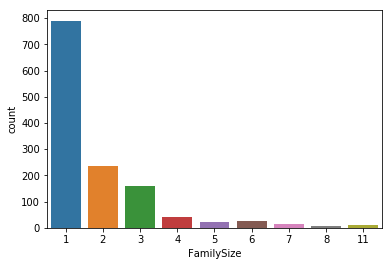

In [308]:
sns.countplot(full['FamilySize'])

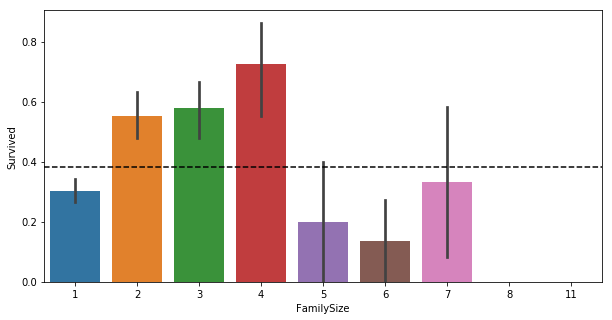

In [309]:
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'FamilySize', y='Survived');
plt.axhline(y=0.3838, color='k', linestyle='--')

In [310]:
full['FamilySize'][full['FamilySize'] > 7] = 7
dummies = pd.get_dummies(full['FamilySize'], prefix='FamilySize')
full = pd.concat([full, dummies], axis=1)

年龄特征除了男孩，中年妇女和老年妇女 其他的可以丢弃

## 姓名分析

In [311]:
full['Title'] = full['Name'].str.extract('([A-Za-z]+)\.', expand=True)
title_replacements = {"Mlle": "Other", "Rev": "Other", "Col": "Other", "Don": "Other",
                          "Mme": "Other", "Dr": "Other", "Dona": "Other",
                          "Jonkheer": "Other", "Capt": "Other", "Countess": "Other",
                          }
full.replace({'Title': title_replacements}, inplace=True)
full.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_C,FamilySize,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,Title
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,0,2,0,1,0,0,0,0,0,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,1,2,0,1,0,0,0,0,0,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,0,1,1,0,0,0,0,0,0,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,2,0,1,0,0,0,0,0,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,0,1,1,0,0,0,0,0,0,Mr


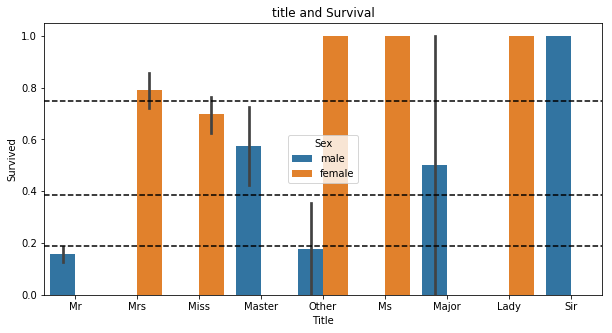

In [312]:
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'Title', y='Survived', hue='Sex');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.axhline(y=0.75, color='k', linestyle='--')
plt.axhline(y=0.19, color='k', linestyle='--')
plt.title('title and Survival');

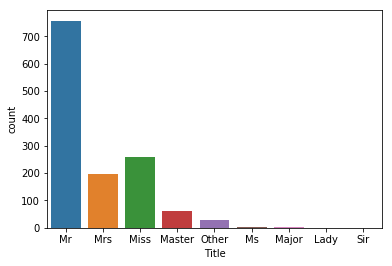

In [313]:
sns.countplot(full['Title'])

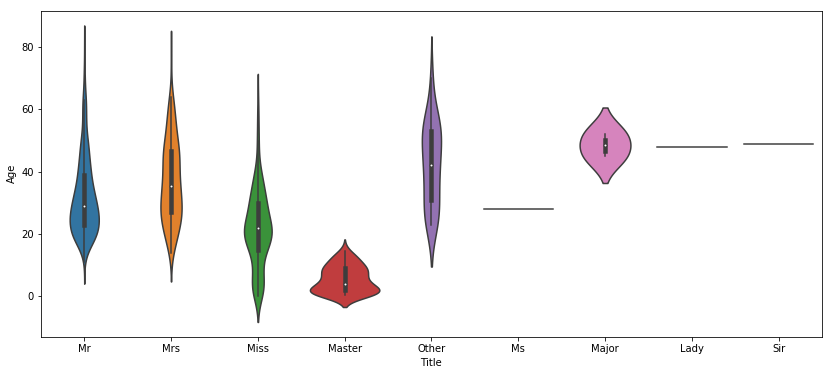

In [314]:
# display(title.groupby('Title').describe());
plt.figure(figsize = (14,6))
sns.violinplot(data = full, x = 'Title', y = 'Age');

In [315]:
full[full['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_C,FamilySize,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,Title
PassengerId,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,...,0,1,1,0,0,0,0,0,0,Mr
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,...,0,1,1,0,0,0,0,0,0,Mr
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,...,1,1,1,0,0,0,0,0,0,Mrs
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,...,1,1,1,0,0,0,0,0,0,Mr
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,...,0,1,1,0,0,0,0,0,0,Miss
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,...,0,1,1,0,0,0,0,0,0,Mr
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,...,1,2,0,1,0,0,0,0,0,Mrs
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,...,0,1,1,0,0,0,0,0,0,Miss
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,...,1,1,1,0,0,0,0,0,0,Mr


In [316]:
title_age_dict = {}

# Calculate mean age of each title group
for t in full.Title.unique():
    title_age_dict[t] = full[full.Title == t].Age.mean() 

# 填充缺失的年龄值
idx = full.Age.isnull()
full.loc[idx, 'Age'] = full.loc[idx].Title.map(title_age_dict)
full.loc[idx]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_C,FamilySize,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,Title
PassengerId,,,,,,,,,,,,,,,,,,,,,
6,32.252151,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,...,0,1,1,0,0,0,0,0,0,Mr
18,32.252151,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,...,0,1,1,0,0,0,0,0,0,Mr
20,36.994118,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,...,1,1,1,0,0,0,0,0,0,Mrs
27,32.252151,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,...,1,1,1,0,0,0,0,0,0,Mr
29,21.774238,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,...,0,1,1,0,0,0,0,0,0,Miss
30,32.252151,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,...,0,1,1,0,0,0,0,0,0,Mr
32,36.994118,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,...,1,2,0,1,0,0,0,0,0,Mrs
33,21.774238,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,...,0,1,1,0,0,0,0,0,0,Miss
37,32.252151,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,...,1,1,1,0,0,0,0,0,0,Mr


In [317]:
# 添加年龄特征
full['Boy'] = (full['Age'] <= 14) * (full['Sex'] == 'male').astype(int)
full['MidLady'] = ((full['Age'] <= 36) & (full['Age'] > 31)) * (full['Sex'] == 'female').astype(int)
full['OldLady'] = ((full['Age'] <= 80) & (full['Age'] > 50)) * (full['Sex'] == 'female').astype(int)

非常明确，选取Ms,Lady,Sir作为二元特征，其余的丢弃(量很小，可以舍弃)
other和female做一个交叉特征
major和master提出来

In [318]:
full['Title_Ms'] = (full['Title'] == 'Ms').astype(int)
full['Title_Lady'] = (full['Title'] == 'Lady').astype(int)
full['Title_Sir'] = (full['Title'] == 'Sir').astype(int)
full['Title_Major'] = (full['Title'] == 'Major').astype(int)
full['Title_Master'] = (full['Title'] == 'Master').astype(int)
full['Title_OtherFemale'] = (full['Title'] == 'Other') * (full['Sex'] == 'female').astype(int)

## 票价分析

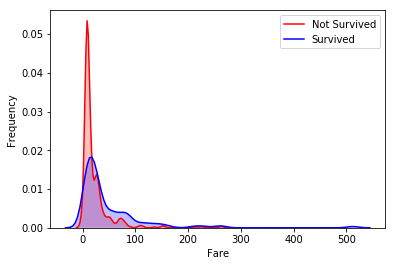

In [319]:
g = sns.kdeplot(full["Fare"][(full["Survived"] == 0) & (full["Fare"].notnull())], color="Red", shade = True)
g = sns.kdeplot(full["Fare"][(full["Survived"] == 1) & (full["Fare"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

好像低价票存活率稍低，也不是特别明显，暂时就先这样
## Cabin分析

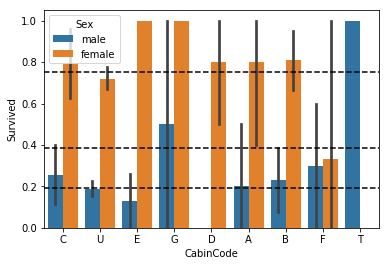

In [320]:
full['CabinCode'] = pd.Series([i[0] if not pd.isnull(i) else 'U' for i in full['Cabin'] ])
sns.barplot(data = full, x= 'CabinCode', y='Survived', hue='Sex')
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.axhline(y=0.75, color='k', linestyle='--')
plt.axhline(y=0.19, color='k', linestyle='--')

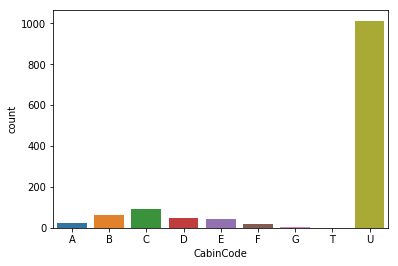

In [321]:
sns.countplot(full["CabinCode"],order=['A','B','C','D','E','F','G','T','U'])


In [322]:
# E F G舱相对有价值
full['Cabin_E'] = (full['CabinCode'] == 'E').astype(int)
full['Cabin_G'] = (full['CabinCode'] == 'G').astype(int)
full['Cabin_F'] = (full['CabinCode'] == 'F').astype(int)

In [323]:
full.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title_Ms,Title_Lady,Title_Sir,Title_Major,Title_Master,Title_OtherFemale,CabinCode,Cabin_E,Cabin_G,Cabin_F
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,0,0,0,0,0,0,C,0,0,0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,0,0,0,0,0,U,0,0,0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,0,0,0,0,0,0,C,0,0,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,0,0,0,0,0,U,0,0,0
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,0,0,0,0,0,0,U,0,0,0


In [324]:
full.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Age_quartile',
       'TicketHead', 'Ticket_A5', 'Ticket_PC', 'Ticket_WC',
       'Ticket_SOTONOQ', 'isMale', 'Embarked_C', 'FamilySize',
       'FamilySize_1', 'FamilySize_2', 'FamilySize_3', 'FamilySize_4',
       'FamilySize_5', 'FamilySize_6', 'FamilySize_7', 'Title', 'Boy',
       'MidLady', 'OldLady', 'Title_Ms', 'Title_Lady', 'Title_Sir',
       'Title_Major', 'Title_Master', 'Title_OtherFemale', 'CabinCode',
       'Cabin_E', 'Cabin_G', 'Cabin_F'], dtype=object)

In [325]:
full.drop(['Age', 'Cabin', 'Embarked', 'Name', 'Parch', 
           'Sex', 'SibSp', 'Ticket', 'Age_quartile',
           'FamilySize', 'Title', 'TicketHead', 'CabinCode'], axis=1, inplace=True)

In [326]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
full.loc[(full.Fare.isnull()), 'Fare'] = 0
full['Fare'] = scaler.fit_transform(full[['Fare']])

In [327]:
full.head()

,Fare,PassengerId,Pclass,Survived,Ticket_A5,Ticket_PC,Ticket_WC,Ticket_SOTONOQ,isMale,Embarked_C,...,OldLady,Title_Ms,Title_Lady,Title_Sir,Title_Major,Title_Master,Title_OtherFemale,Cabin_E,Cabin_G,Cabin_F
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,-0.503023,1,3,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.734878,2,1,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.489974,3,3,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.383356,4,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.487558,5,3,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [328]:
full.drop(['PassengerId'], axis=1, inplace=True)
full.head()

,Fare,Pclass,Survived,Ticket_A5,Ticket_PC,Ticket_WC,Ticket_SOTONOQ,isMale,Embarked_C,FamilySize_1,...,OldLady,Title_Ms,Title_Lady,Title_Sir,Title_Major,Title_Master,Title_OtherFemale,Cabin_E,Cabin_G,Cabin_F
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,-0.503023,3,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.734878,1,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.489974,3,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.383356,1,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.487558,3,0.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [329]:
linear_train = full[:891]
linear_test = full[891:]
linear_test.drop(['Survived'], axis=1, inplace=True)
print(linear_train.shape)
print(linear_test.shape)
linear_train.to_csv('linear_train.csv', index=False)
linear_test.to_csv('linear_test.csv', index=False)

(891, 28)
(418, 27)


In [330]:
linear_test.head()

,Fare,Pclass,Ticket_A5,Ticket_PC,Ticket_WC,Ticket_SOTONOQ,isMale,Embarked_C,FamilySize_1,FamilySize_2,...,OldLady,Title_Ms,Title_Lady,Title_Sir,Title_Major,Title_Master,Title_OtherFemale,Cabin_E,Cabin_G,Cabin_F
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,-0.491826,3,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
893,-0.507857,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
894,-0.455901,2,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
895,-0.475717,3,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
896,-0.405638,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
